In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-cluster -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper functions for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_mesh(pos, face):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    ax.plot_trisurf(pos[:, 0], pos[:, 1], pos[:, 2], triangles=data.face.t(), antialiased=False)
    plt.show()


def visualize_points(pos, edge_index=None, index=None):
    fig = plt.figure(figsize=(4, 4))
    if edge_index is not None:
        for (src, dst) in edge_index.t().tolist():
             src = pos[src].tolist()
             dst = pos[dst].tolist()
             plt.plot([src[0], dst[0]], [src[1], dst[1]], linewidth=1, color='black')
    if index is None:
        plt.scatter(pos[:, 0], pos[:, 1], s=50, zorder=1000)
    else:
       mask = torch.zeros(pos.size(0), dtype=torch.bool)
       mask[index] = True
       plt.scatter(pos[~mask, 0], pos[~mask, 1], s=50, color='lightgray', zorder=1000)
       plt.scatter(pos[mask, 0], pos[mask, 1], s=50, zorder=1000)
    plt.axis('off')
    plt.show()

2.3.1+cu121
  Preparing metadata (setup.py) ... done


In [ ]:
pip install openmesh


In [ ]:
pip install tripy


In [ ]:
pip install plyfile

In [ ]:
import os
from plyfile import PlyData, PlyElement

def ply_to_off(input_ply_file, output_off_file):
    # Read the .ply file
    ply_data = PlyData.read(input_ply_file)

    # Extract vertices and faces from the .ply file
    vertices = [(vertex['x'], vertex['y'], vertex['z']) for vertex in ply_data['vertex']]

    # Check if the 'face' element is present
    if 'face' in ply_data:
        faces = [face for face in ply_data['face']['vertex_indices']]
    else:
        # If 'face' element is not present, create faces assuming a simple mesh
        faces = [[i for i in range(len(vertices))]]

    # Write the vertices and faces to a .off file
    with open(output_off_file, 'w') as off_file:
        off_file.write('OFF\n')
        off_file.write('{} {} 0\n'.format(len(vertices), len(faces)))

        # Write vertices
        for vertex in vertices:
            off_file.write('{} {} {}\n'.format(vertex[0], vertex[1], vertex[2]))

        # Write faces
        for face in faces:
            off_file.write('{} '.format(len(face)))
            off_file.write(' '.join(map(str, face)))
            off_file.write('\n')

    print('Conversion completed: {} -> {}'.format(input_ply_file, output_off_file))

def batch_convert_ply_to_off(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file_name in os.listdir(input_folder):
        if file_name.endswith('.ply'):
            input_ply_file = os.path.join(input_folder, file_name)
            output_off_file = os.path.join(output_folder, os.path.splitext(file_name)[0] + '.off')
            ply_to_off(input_ply_file, output_off_file)

if __name__ == "__main__":
    input_folder_path = '/content/drive/MyDrive/GraphPointNet/pointclouds/c_r'
    output_folder_path = '/content/drive/MyDrive/GraphPointNet/OFF/c_r'

    batch_convert_ply_to_off(input_folder_path, output_folder_path)


Conversion completed: /content/drive/MyDrive/GraphPointNet/pointclouds/c_r/260_mask.ply -> /content/drive/MyDrive/GraphPointNet/OFF/c_r/260_mask.off


In [ ]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.file_list[idx])
        mesh_points = self.load_off(file_path)

        sample = {'points': mesh_points}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])

        return torch.tensor(vertices, dtype=torch.float32)

# Example usage
root_dir = '/content/drive/MyDrive/GraphPointNet/OFF/c_r'
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]
print(sample['points'])


tensor([[ 0.0582, -0.1804],
        [ 0.0041, -0.0884],
        [-0.0102, -0.2364],
        ...,
        [-0.0412, -0.4244],
        [-0.0383, -0.3012],
        [-0.0566, -0.4536]])


In [ ]:
pip install mayavi

In [ ]:
pip install PyQt5


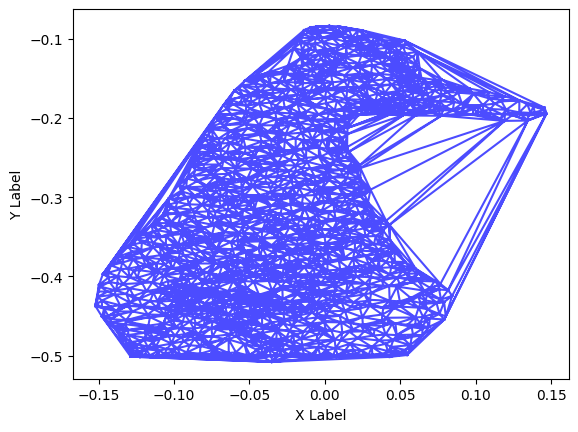

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.file_list[idx])
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face']}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and visualization
root_dir = '/content/drive/MyDrive/GraphPointNet/OFF/c_r'
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]

# Visualize 2D mesh using matplotlib
fig, ax = plt.subplots()
ax.triplot(sample['pos'][:, 0], sample['pos'][:, 1], sample['face'], color='blue', alpha=0.7)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()


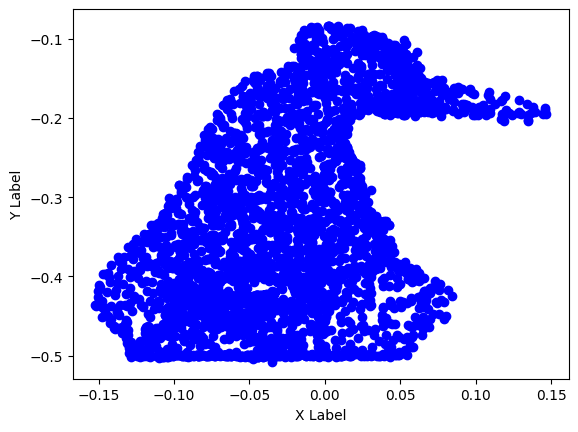

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.file_list[idx])
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face']}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and visualization
root_dir = '/content/drive/MyDrive/GraphPointNet/OFF/c_r'
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]

# Create a 2D scatter plot for the point cloud
fig, ax = plt.subplots()
ax.scatter(sample['pos'][:, 0], sample['pos'][:, 1], c='blue', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()


In [ ]:
pip install networkx


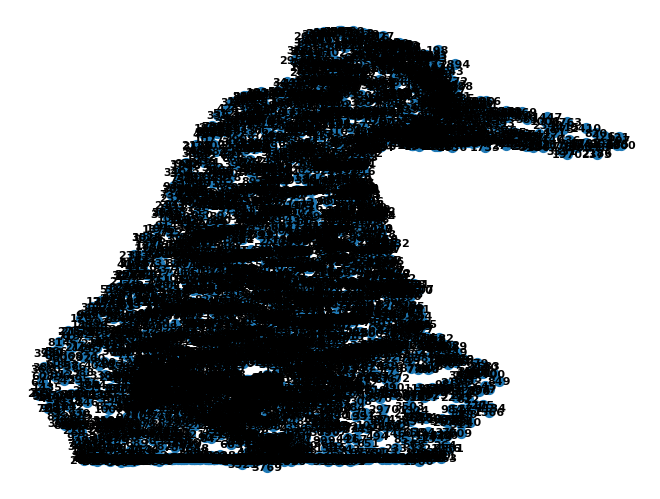

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx  # Import networkx for graph creation
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.file_list[idx])
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face']}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and graph creation
root_dir = '/content/drive/MyDrive/GraphPointNet/OFF/c_r'
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]

# Create a graph from the faces in the mesh data
G = nx.Graph()

# Add nodes to the graph based on 'pos' tensor
for i, pos in enumerate(sample['pos']):
    G.add_node(i, pos=pos.numpy())

# Add edges to the graph based on 'face' tensor
for face in sample['face']:
    for edge in zip(face[:-1], face[1:]):
        G.add_edge(*edge)

# Visualize the graph
pos_dict = {i: pos.numpy() for i, pos in enumerate(sample['pos'])}
nx.draw(G, pos=pos_dict, with_labels=True, font_weight='bold', node_size=50, font_size=8)
plt.show()


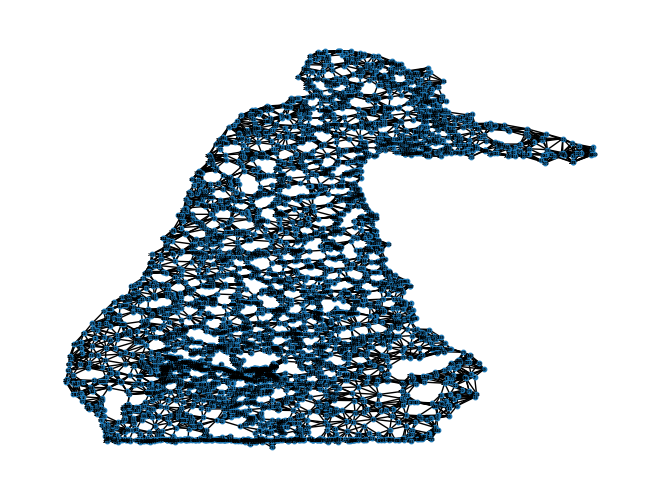

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch_geometric.transforms as T
from torch.utils.data import Dataset
from torch_cluster import knn_graph
import networkx as nx

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.file_list[idx])
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face']}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and graph creation using knn_graph
root_dir = '/content/drive/MyDrive/GraphPointNet/OFF/c_r'
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]

# Create k-nearest neighbors graph
k = 10  # Set the number of neighbors (adjust as needed)
pos = sample['pos']
edge_index = knn_graph(pos, k, batch=None, loop=False)

# Visualize the graph
G = nx.Graph()
G.add_nodes_from(range(pos.size(0)))

for i, j in edge_index.t().tolist():
    G.add_edge(i, j)

# Draw the graph
pos_dict = {i: pos[i].numpy() for i in range(pos.size(0))}
nx.draw(G, pos=pos_dict, with_labels=True, font_weight='bold', node_size=10, font_size=2)
plt.show()


In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch_geometric.transforms as T
from torch.utils.data import Dataset
from torch_cluster import knn_graph
import networkx as nx
import pandas as pd

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.file_list[idx])
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face']}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and graph creation using knn_graph
root_dir = '/content/drive/MyDrive/GraphPointNet/OFF/c1'
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]

# Create k-nearest neighbors graph
k = 2  # Set the number of neighbors (adjust as needed)
pos = sample['pos']
edge_index = knn_graph(pos, k, batch=None, loop=False)

# Calculate edge weights based on the density of the graph
density = nx.density(nx.from_edgelist(edge_index.t().tolist()))
edge_weights = [1.0 / density] * edge_index.size(1)

# Create the weighted graph
G = nx.Graph()
for i, j in edge_index.t().tolist():
    G.add_edge(i, j, weight=edge_weights.pop(0))

# Calculate graphical features
degree_centralities = nx.degree_centrality(G)
closeness_centralities = nx.closeness_centrality(G)
betweenness_centralities = nx.betweenness_centrality(G)
eigenvector_centralities = nx.eigenvector_centrality(G, max_iter=500)
clustering_coefficients = nx.clustering(G)

# Calculate additional graph features
if nx.is_connected(G):
    diameter = nx.diameter(G)
    radius = nx.radius(G)
    average_path_length = nx.average_shortest_path_length(G)
else:
    diameter = radius = average_path_length = np.nan


graph_density = nx.density(G)
average_neighbor_degree = nx.average_neighbor_degree(G)
structural_holes = nx.constraint(G)

# Calculate the mean value for each feature
degree_centrality_mean = np.mean(list(degree_centralities.values()))
closeness_centrality_mean = np.mean(list(closeness_centralities.values()))
betweenness_centrality_mean = np.mean(list(betweenness_centralities.values()))
eigenvector_centrality_mean = np.mean(list(eigenvector_centralities.values()))
clustering_coefficient_mean = np.mean(list(clustering_coefficients.values()))

average_neighbor_degree_mean = np.mean(list(average_neighbor_degree.values()))
structural_holes_mean = np.mean(list(structural_holes.values()))

# Combine features into a DataFrame
features_df = pd.DataFrame({
    'Degree Centrality': [degree_centrality_mean],
    'Closeness Centrality': [closeness_centrality_mean],
    'Betweenness Centrality': [betweenness_centrality_mean],
    'Eigenvector Centrality': [eigenvector_centrality_mean],
    'Clustering Coefficient': [clustering_coefficient_mean],
    'Diameter': [diameter],
    'Radius': [radius],
    'Average Path Length': [average_path_length],

    'Graph Density': [graph_density],
    'Average Neighbor Degree': [average_neighbor_degree_mean],
    'Structural Holes': [structural_holes_mean]
})

# Save features to CSV
features_df.to_csv("graphical_features.csv", index=False)

print("Graphical features saved to graphical_features.csv")


Graphical features saved to graphical_features.csv


In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch_geometric.transforms as T
from torch.utils.data import Dataset
from torch_cluster import knn_graph
import networkx as nx
import pandas as pd

class CustomDataset(Dataset):
    def __init__(self, file_path, transform=None):
        self.file_path = file_path
        self.transform = transform

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        mesh_data = self.load_off(self.file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face']}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

def calculate_graph_features(G):
    degree_centralities = nx.degree_centrality(G)
    closeness_centralities = nx.closeness_centrality(G)
    betweenness_centralities = nx.betweenness_centrality(G)
    eigenvector_centralities = nx.eigenvector_centrality(G, max_iter=500)
    clustering_coefficients = nx.clustering(G)

    if nx.is_connected(G):
        diameter = nx.diameter(G)
        radius = nx.radius(G)
        average_path_length = nx.average_shortest_path_length(G)
    else:
        diameter = radius = average_path_length = np.nan

    graph_density = nx.density(G)
    average_neighbor_degree = nx.average_neighbor_degree(G)
    structural_holes = nx.constraint(G)

    degree_centrality_mean = np.mean(list(degree_centralities.values()))
    closeness_centrality_mean = np.mean(list(closeness_centralities.values()))
    betweenness_centrality_mean = np.mean(list(betweenness_centralities.values()))
    eigenvector_centrality_mean = np.mean(list(eigenvector_centralities.values()))
    clustering_coefficient_mean = np.mean(list(clustering_coefficients.values()))
    average_neighbor_degree_mean = np.mean(list(average_neighbor_degree.values()))
    structural_holes_mean = np.mean(list(structural_holes.values()))

    return {
        'Degree Centrality': degree_centrality_mean,
        'Closeness Centrality': closeness_centrality_mean,
        'Betweenness Centrality': betweenness_centrality_mean,
        'Eigenvector Centrality': eigenvector_centrality_mean,
        'Clustering Coefficient': clustering_coefficient_mean,
        'Diameter': diameter,
        'Radius': radius,
        'Average Path Length': average_path_length,
        'Graph Density': graph_density,
        'Average Neighbor Degree': average_neighbor_degree_mean,
        'Structural Holes': structural_holes_mean
    }

root_dir = '/content/drive/MyDrive/GraphPointNet/OFF/c1'
output_csv = "graphical_features.csv"

# Initialize an empty DataFrame to store features
all_features_df = pd.DataFrame()

# Iterate over each file in the root directory
for file_name in os.listdir(root_dir):
    if file_name.endswith(".off"):
        file_path = os.path.join(root_dir, file_name)
        custom_dataset = CustomDataset(file_path)
        sample = custom_dataset[0]

        # Create k-nearest neighbors graph
        k = 2  # Set the number of neighbors (adjust as needed)
        pos = sample['pos']
        edge_index = knn_graph(pos, k, batch=None, loop=False)

        # Calculate edge weights based on the density of the graph
        density = nx.density(nx.from_edgelist(edge_index.t().tolist()))
        edge_weights = [1.0 / density] * edge_index.size(1)

        # Create the weighted graph
        G = nx.Graph()
        for i, j in edge_index.t().tolist():
            G.add_edge(i, j, weight=edge_weights.pop(0))

        # Calculate features for the graph
        graph_features = calculate_graph_features(G)

        # Append features to the DataFrame
        features_df = pd.DataFrame(graph_features, index=[0])
        all_features_df = pd.concat([all_features_df, features_df], ignore_index=True)

# Save features to CSV
all_features_df.to_csv(output_csv, index=False)

print(f"Graphical features saved to {output_csv}")
